##  *Part 1*

I am reading in the abalone dataset from UC Irvine's Machine Learning repository. In order to ensure easiest user-readability and reproducibility I directly read a url as opposed to providing a separate .csv file to have in the user's local directory. In doing so, I have tried to make this project as streamlined as possible. Furthermore, for the sake of convenience I have used the Juptyer Notebook environment in order to merge my code and analysis together as one coherent and aesthetically pleasing report.

For the purpose of this project I am investigating data of Blacklip Abalone (subspecies: Haliotis rubra). The reason why I have chosen this dataset rests largely in the fact that Blacklip Abalone are a species victim to artificial farming and environmental concerns such as overfishing and environment deterioration. By investigating a sample of an already diminishing wild population I hope to gain some insights before this subspecies goes extinct in the near future.

In [1]:
col_names = c("Sex", "Length", "Diameter", "Height", "Whole.weight", "Shucked.weight", "Viscera.weight", "Shell.weight", "Rings")
abalone <- read.table('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', sep="," , col.names=col_names)
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Description of variables in context :


**Sex:** Male (M), Female (F), and Infant (I)

**Length:** Longest shell measurement (mm)
 
**Diameter:** Measurement perpendicular to length (mm)

**Height:** Height as measured with with meat in shell (mm)
 
**Whole weight:** whole abalone weight pre-bleeding (grams)

**Shucked weight:** weight of meat (grams)

**Viscera weight:** gut weight post-bleeding (grams)

**Shell weight:** weight after being dried (grams)

**Rings:** Integer number of rings per specimen 

Before performing any rigorous statistical tests, I first check to see if any NA values exist in this dataset:

In [2]:
any(is.na(abalone))
# no NA values exist

[1] FALSE

As part of my initial exploration I use the summary() command to see how data is distributed across each of our variables of interest. From my observation, Length and Diameter have similar variance as both look to be equally spread out from their mean. This is likely due to the fact Diameter is the measurement taken perpendicular to Length.

In [3]:
summary(abalone)

 Sex          Length         Diameter          Height        Whole.weight   
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 Shucked.weight   Viscera.weight    Shell.weight        Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

Confirm the above hypothesis by looking at variance of each variable:

In [4]:
var(abalone$Diameter)
var(abalone$Length)

[1] 0.009848551

[1] 0.01442231

Moving onto visualzing my data I want to first compare the number of Rings across the different "Sex" that are part of this dataset. 

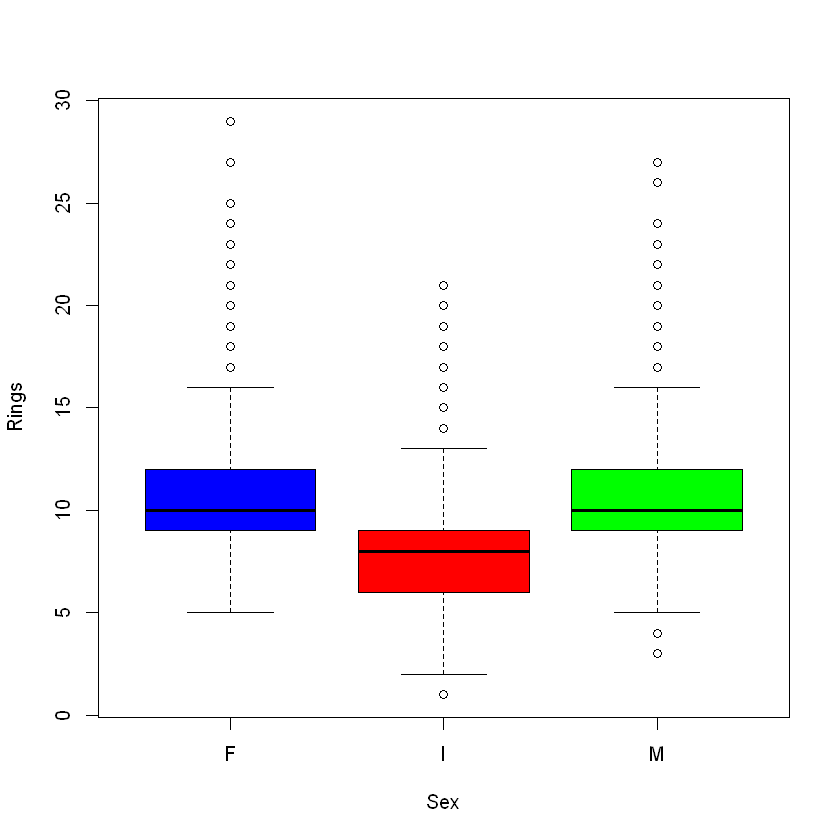

In [5]:
boxplot(Rings~Sex, col = c('blue','red','green'),data=abalone)

Based on this boxplot it appears that Female and Male abalone roughly follow the same distribution with both having median Ring counts of roughly 10. In addition the Female and Male distribution appear to be more right skewed than the Infant subset. 

In [6]:
numeric_columns <- Filter(is.numeric,abalone)
cor(numeric_columns)

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
Length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056,0.5567196
Diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298,0.5746599
Height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380,0.5574673
Whole.weight,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554,0.5403897
Shucked.weight,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171,0.4208837
Viscera.weight,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563,0.5038192
Shell.weight,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000,0.6275740
Rings,0.5567196,0.5746599,0.5574673,0.5403897,0.4208837,0.5038192,0.6275740,1.0000000


After calculating the correlation between each of the numeric pairs in this dataset it appears that Length and Diameter have the strongest linear relationship with an r = 0.99 indicating a strong positive linear relationship between the two variables. Conversely, Rings and Shucked.weight have the weakest linear relationship with r = 0.42 indiciating a moderate positive linear relationship between the two variables. This is not worth investigating further since we are told Diameter is perpendicular to Length. Let us move on to investigating other relationships.

One relationship that is worth investigating is the relationship between Rings and the Length of an abalone. Common sense would dictate that the larger an abalone the more rings it has, but is that necessarily true? Let's observe how this relationship varies first using an interaction plot across different Sex:

In [7]:
summary(aov(Rings~Length*as.factor(Sex), data=abalone))

                        Df Sum Sq Mean Sq F value   Pr(>F)    
Length                   1  13455   13455 1969.12  < 2e-16 ***
as.factor(Sex)           2   1070     535   78.26  < 2e-16 ***
Length:as.factor(Sex)    2    387     194   28.33 6.04e-13 ***
Residuals             4171  28499       7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The Length of an abalone does much of the heavy lifting as a predictor. In addition the Length and Sex interaction is worth investigating as well as Sex and Length on their own.

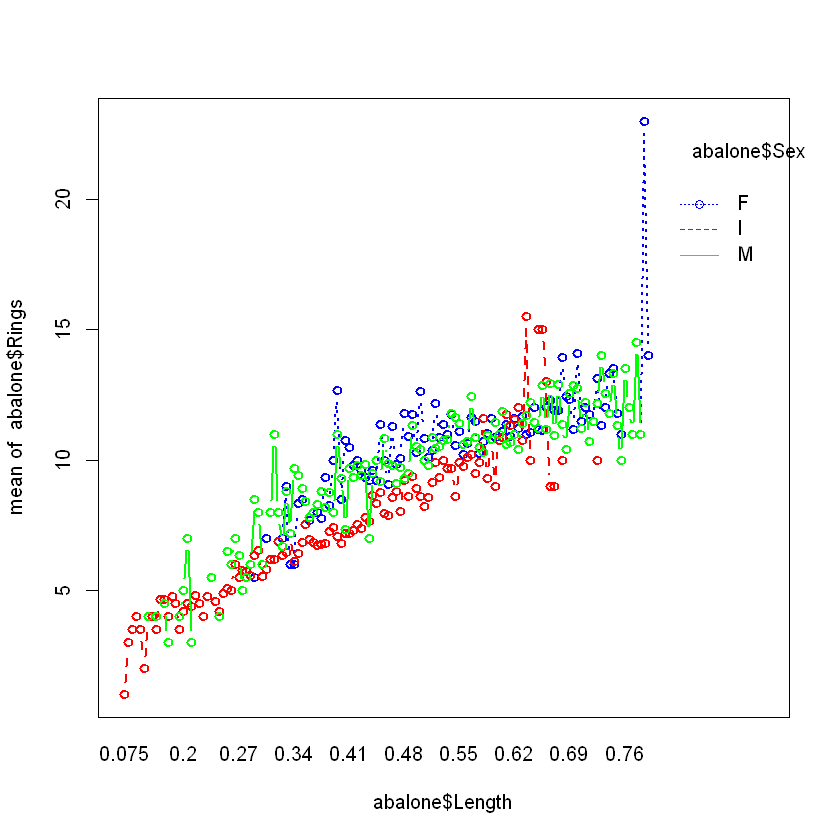

In [8]:
interaction.plot(x.factor=abalone$Length,trace.factor=abalone$Sex, response=abalone$Rings, col=c('blue','red','green'), lwd=2, type='b', pch=1)

The effect of Length on Rings is pretty clear with all 3 lines increasing. The effect of Sex on Length is mostly clear with Male and Female abalone's seemingly following the same trend, and Infants (juveniles) falling slightly beloe as a result of having fewer rings and shorter length. However the effect of Sex depends depends on Length, or vice versa seeing that the lines are not all perfectly parallel.

## *Part 2*

# Research Question #1:

Abalone are marine snails that are commonly consumed. Overfishing and poaching have reduced wild populations to such an extent that farmed abalone now supplies most of the abalone meat consumed. This dataset consists of wild Blacklip Abalone (Haliotis rubr) from the North Coast and Islands of Bass Strait. 

## 1a

On average farmed abalone of this subspecies weigh 1.24 grams. With this information in mind can we extrapolate to say that abalone that is not farmed (i.e. wild) weighs significantly less than their farmed counterpart? 

For the purposes of comparing weights I will be using Whole.weight (i.e. shell + meat + guts) of the abalone dataset. 

I will perform a 𝑡-based hypothesis test at 𝛼 = 0.05 to see if my wild abalone mean Whole.weight is less than the national farmed average abalone average weight of 1.24 grams. 

In order to accurately present this t-test I have decided to remove all data concerning Infants as the national farmed average figure that I found concerned adults and NOT juvenile abalone.

In [9]:
abalone_Adults <- abalone[abalone["Sex"] == 'M' | abalone["Sex"] == 'F',]

In [10]:
t.test(x=abalone_Adults$Whole.weight, alternative = 'less', mu = 1.24)
# Ho: Population mean Whole.weight is equal to 1.24 grams


	One Sample t-test

data:  abalone_Adults$Whole.weight
t = -26.216, df = 2834, p-value < 2.2e-16
alternative hypothesis: true mean is less than 1.24
95 percent confidence interval:
     -Inf 1.030855
sample estimates:
mean of x 
 1.016849 


"As evidenced by this t-based hypothesis test at 𝛼 = 0.05 the mean Whole.weight of wild abalone is indeed less than the mean weight of farmed abalone. This is indicative of the trend of overfishing and man-made selectivity artificially increasing the weight of marine life such as abalone for consumption."

## 1b

On the topic of weight, I also want to inspect how weight differs across Males and Female abalone. I will perform a 𝑡-based hypothesis test at 𝛼 = 0.05 to see if Male abalone's mean Whole.weight is higher than Female abalone's mean Whole.weight. In an effort to see if there is a significance difference between the two I will also find a 95% two-sided confidence interval for the difference in mean Whole.weight between Male and Female abalone.

**Note:** It is not worth investigating infant Whole.weight with relation to adults since naturally infants will weigh less and we do not have data on Female Infants and Male Infants - but rather Infants as a whole.

In [11]:
t.test(x=abalone$Whole.weight[abalone$Sex == 'F'], y=abalone$Whole.weight[abalone$Sex == 'M'], alternative='greater')
# Ho: There is no difference in Male mean Whole.weight and Female mean Whole.weight


	Welch Two Sample t-test

data:  abalone$Whole.weight[abalone$Sex == "F"] and abalone$Whole.weight[abalone$Sex == "M"]
t = 3.2531, df = 2820.4, p-value = 0.0005775
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.02721725        Inf
sample estimates:
mean of x mean of y 
1.0465321 0.9914594 


"Since p-value < alpha at 0.05, we can reject the Ho. We have sufficient evidence that Female abalone mean Whole.weight is greater than Male abalone mean Whole.Weight."

In [12]:
t.test(x=abalone$Whole.weight[abalone$Sex == 'F'], y=abalone$Whole.weight[abalone$Sex == 'M'], conf.level=.95)$conf.int
# looking at differences in means

[1] 0.02187753 0.08826789
attr(,"conf.level")
[1] 0.95

"We are 95% confident that Female abalone Whole.weight is on average between 0.02 and 0.09 grams more than Male abalone Whole.weight. This aligns with the results of our hypothesis test."

*The interval does not include 0, so WE CAN be 95% confident that there is a significant difference in mean Whole.weight between the Male and Female abalone.*

# Research Question #2:

## 2a
We are provided with many measurements to see how abalone weight changes once a specimen is taken out of water, stripped of its meat, gutted, and then de-shelled. With all this information concerning weight, let us create a regression model to estimate Shucked.weight (i.e. the weight of a specimen's meat, discluding shell, guts, etc.) based on its Whole.weight and respective Sex. I will also get individual models for each Sex.

With these models we can estimate the yield of an abalone based on its weight and Sex. As a result, a fisherman can now deduce the amount of sellable abalone meat based on the weight of their catch. 


In [13]:
mod1=lm(Shucked.weight~Whole.weight*Sex, data=abalone)
summary(mod1)


Call:
lm(formula = Shucked.weight ~ Whole.weight * Sex, data = abalone)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31379 -0.01948 -0.00084  0.02405  0.44568 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.012596   0.003926  -3.208 0.001345 ** 
Whole.weight       0.438385   0.003470 126.347  < 2e-16 ***
SexI               0.016030   0.004745   3.379 0.000735 ***
SexM              -0.006149   0.005078  -1.211 0.225952    
Whole.weight:SexI -0.003482   0.006207  -0.561 0.574824    
Whole.weight:SexM  0.017197   0.004544   3.785 0.000156 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05396 on 4171 degrees of freedom
Multiple R-squared:  0.941,	Adjusted R-squared:  0.9409 
F-statistic: 1.33e+04 on 5 and 4171 DF,  p-value: < 2.2e-16


**Regression Equation (with interaction):** Shucked.weight = -0.013 + 0.438(Whole.weight) + 0.016(SexI) - 0.006(SexM) - 0.003(Whole.weight:SexI) + 0.017(Whole.weight:SexM)


In [14]:
female <- abalone[abalone$Sex == 'F',]
mod2 = lm(Shucked.weight~Whole.weight, data=female)
summary(mod2)


Call:
lm(formula = Shucked.weight ~ Whole.weight, data = female)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31379 -0.02843  0.00211  0.03331  0.33581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.012596   0.004534  -2.778  0.00555 ** 
Whole.weight  0.438385   0.004007 109.397  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06232 on 1305 degrees of freedom
Multiple R-squared:  0.9017,	Adjusted R-squared:  0.9016 
F-statistic: 1.197e+04 on 1 and 1305 DF,  p-value: < 2.2e-16


**Regression Equation (Group Female):** Shucked.weight = -0.013 + 0.438(Whole.weight)

***Interpretation:*** If Whole.weight is increased by 1 pround Shucked.weight increases by 0.438 prounds.

In [15]:
infant <- abalone[abalone$Sex == 'I',]
mod3 = lm(Shucked.weight~Whole.weight, data=infant)
summary(mod3)


Call:
lm(formula = Shucked.weight ~ Whole.weight, data = infant)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14924 -0.01139 -0.00377  0.00925  0.44568 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.003434   0.001552   2.213   0.0271 *  
Whole.weight 0.434902   0.002998 145.046   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03143 on 1340 degrees of freedom
Multiple R-squared:  0.9401,	Adjusted R-squared:  0.9401 
F-statistic: 2.104e+04 on 1 and 1340 DF,  p-value: < 2.2e-16


**Regression Equation (Group Infant):** Shucked.weight = 0.003 + 0.435(Whole.weight)

***Interpretation:*** If Whole.weight is increased by 1 gram Shucked.weight increases by 0.435 grams.

In [16]:
male <- abalone[abalone$Sex == 'M',]
mod4 = lm(Shucked.weight~Whole.weight, data=male)
summary(mod4)


Call:
lm(formula = Shucked.weight ~ Whole.weight, data = male)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25144 -0.02995  0.00379  0.03198  0.36291 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.018745   0.003664  -5.116 3.51e-07 ***
Whole.weight  0.455582   0.003339 136.459  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06139 on 1526 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9242 
F-statistic: 1.862e+04 on 1 and 1526 DF,  p-value: < 2.2e-16


**Regression Equation (Group Male):** Shucked.weight = -0.019 + 0.456(Whole.weight)

***Interpretation:*** If Whole.weight is increased by 1 gram Shucked.weight increases by 0.456 grams.

## 2b
One of the most important criteria for a fisherman is the Shucked.weight produced. From the previous test we know that Whole.weight varies between Male and Female abalones. However, can the same be said about shucked.weight. The shucked.weight constitutes the amount of sellable meat that an individual abalone can yield. As a result, I will investigate if Whole.weight:Sex interaction is significant (i.e. is this predictor significant when deducing Shucked.weight).


In [17]:
mod5 = lm(Shucked.weight~Whole.weight+Sex, data=abalone)
mod6 = lm(Shucked.weight~Whole.weight*Sex, data=abalone)
anova(mod5, mod6)

# H0: Whole.weight:SexI and Whole.weight:SexM are all ZERO slope
# H1: At least one of Whole.weight:SexI and Whole.weight:SexM are NOT zero

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4173,12.20201,NA,NA,NA,NA
4171,12.14345,2,0.0585594,10.05691,4.393763e-05


Clearly we have Large F statistics and low p-value meaning that there is a signficant difference in the fit of the two models:
The added predictor(s) which are Whole.weight:SexI and Whole.weight:SexM are significantly beneficial and good predictors.

## 2c
After investigating the effect of Sex and Whole.weight on the amount of Shucked.weight we yield it is worth looking into the other significant predictors that exist. In order to do so I will build a multiple regression model that uses all other variables in the data frame as predictors. I will implement a backwards stepwise procedure to explore what predictors contribute to Shucked.weight.


In [18]:
# FULL MODEL (with interactions)
mod7 =lm(Shucked.weight~.^2, data=abalone) 
summary(mod7)


Call:
lm(formula = Shucked.weight ~ .^2, data = abalone)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38214 -0.01214 -0.00042  0.01380  0.44522 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  0.0297002  0.0282291   1.052 0.292809    
SexI                         0.0119558  0.0202154   0.591 0.554269    
SexM                         0.0139396  0.0179083   0.778 0.436385    
Length                       0.0136032  0.2247990   0.061 0.951750    
Diameter                    -0.1272681  0.2922477  -0.435 0.663237    
Height                      -0.3388041  0.2872267  -1.180 0.238239    
Whole.weight                 0.6409376  0.0763917   8.390  < 2e-16 ***
Viscera.weight              -0.0585167  0.2785389  -0.210 0.833612    
Shell.weight                -0.5466069  0.1983415  -2.756 0.005879 ** 
Rings                       -0.0056777  0.0028512  -1.991 0.046507 *  
SexI:Length                 -0.0771775  0.

In [19]:
# Based on our overall p-value < 2.2e-16 (< 0.05) there IS something helpful going on, and at least one of 
# the predictors is significant/useful

In [20]:
step(mod7)

Start:  AIC=-27376.65
Shucked.weight ~ (Sex + Length + Diameter + Height + Whole.weight + 
    Viscera.weight + Shell.weight + Rings)^2

                              Df Sum of Sq    RSS    AIC
- Sex:Shell.weight             2  0.000932 5.8230 -27380
- Sex:Length                   2  0.002083 5.8242 -27379
- Height:Rings                 1  0.000083 5.8222 -27379
- Length:Diameter              1  0.000838 5.8229 -27378
- Length:Viscera.weight        1  0.000994 5.8231 -27378
- Sex:Height                   2  0.004388 5.8265 -27378
- Diameter:Height              1  0.002006 5.8241 -27377
- Sex:Rings                    2  0.004895 5.8270 -27377
- Sex:Diameter                 2  0.005428 5.8275 -27377
<none>                                     5.8221 -27377
- Length:Height                1  0.003312 5.8254 -27376
- Whole.weight:Viscera.weight  1  0.003318 5.8254 -27376
- Diameter:Viscera.weight      1  0.003569 5.8257 -27376
- Whole.weight:Shell.weight    1  0.003873 5.8260 -27376
- Height


Call:
lm(formula = Shucked.weight ~ Sex + Length + Diameter + Height + 
    Whole.weight + Viscera.weight + Shell.weight + Rings + Sex:Whole.weight + 
    Sex:Viscera.weight + Sex:Rings + Length:Height + Length:Whole.weight + 
    Length:Shell.weight + Length:Rings + Diameter:Height + Diameter:Whole.weight + 
    Diameter:Viscera.weight + Diameter:Shell.weight + Diameter:Rings + 
    Height:Whole.weight + Height:Viscera.weight + Height:Shell.weight + 
    Whole.weight:Viscera.weight + Whole.weight:Shell.weight + 
    Whole.weight:Rings + Viscera.weight:Shell.weight + Viscera.weight:Rings + 
    Shell.weight:Rings, data = abalone)

Coefficients:
                (Intercept)                         SexI  
                  0.0439777                   -0.0066525  
                       SexM                       Length  
                 -0.0015661                   -0.0479237  
                   Diameter                       Height  
                  0.0194138                   -0.55

In [21]:
# REDUCED MODEL
mod8=lm(Shucked.weight ~ Sex + Length + Diameter + Height + 
    Whole.weight + Viscera.weight + Shell.weight + Rings + Sex:Whole.weight + 
    Sex:Viscera.weight + Sex:Rings + Length:Height + Length:Whole.weight + 
    Length:Shell.weight + Length:Rings + Diameter:Height + Diameter:Whole.weight + 
    Diameter:Viscera.weight + Diameter:Shell.weight + Diameter:Rings + 
    Height:Whole.weight + Height:Viscera.weight + Height:Shell.weight + 
    Whole.weight:Viscera.weight + Whole.weight:Shell.weight + 
    Whole.weight:Rings + Viscera.weight:Shell.weight + Viscera.weight:Rings + 
    Shell.weight:Rings, data = abalone)

In [22]:
# Ensure that the model generated by a backwards stepwise procedure does not remove any important predictors
anova(mod7,mod8)
# we DON'T loose anything of value by removing predictors in the full model

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4132,5.822091,NA,NA,NA,NA
4143,5.835750,-11,-0.01365832,0.8812232,0.5582277


## 2d
On the research side of things, a scientist might have a hard time identifying Male, Female, and Infant abalone while on a research-trip in the mid-Atlatnic. Let us look into how a researcher can use the data from this table to extrapolate what type of Sex an abalone might be based on multiple predictors. This in turn will create a single regression equation for which a researcher can input variables and generate information from. This will be a multinomial regression model. 

In [23]:
library(nnet) 
multi1=multinom(Sex~., data=abalone)

# weights:  30 (18 variable)
initial  value 4588.903530 
iter  10 value 3611.108004
iter  20 value 3569.689317
iter  30 value 3569.621371
iter  30 value 3569.621340
iter  30 value 3569.621339
final  value 3569.621339 
converged


In [24]:
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Let us test our Multinomial model with data from the first row of our dataset

In [25]:
attach(abalone)
round(predict(multi1, data.frame(Length=0.455, Diameter = 0.365, Height = 0.095, Whole.weight = 0.5140, Shucked.weight = 0.2245, Viscera.weight = 0.1010, Shell.weight = 0.150, Rings = 15), type='probs'),3)

F     I     M 
0.288 0.235 0.477

As expected the first row is most likely to be Male.

# Research Question #3:

After doing some research I found that an abalone's age is approximately +1.5 the number of rings. Therefore, I created a separate column for abalone age across each specimen:

In [26]:
abalone$Age <- abalone$Rings + 1.5
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


## 3a

Blacklip Abalone (the subspecies that this sample deals with) are known to have an average life expectancy of 14 years. Given this, let us create a column called Above_average (age) to indicate if an adult specimen (i.e. the Males and Females in this population) are older than the average life expectancy in the wild

In [27]:
for (i in 1:nrow(abalone)) {
    if (abalone$Age[i] > 14) {
        abalone$above_avg[i] <- 1
    }
    else {
        abalone$above_avg[i] <- 0
    }

}
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age,above_avg
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,1
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5,0


## 3b

Let us construct a chi square test in order to see if there is a relationship between Sex and a specimen having an above_avg age. In essence we are trying to gauge if there are more Males that are older or more Females that are older. For this chi square tests Infant data is not taken into account since by default they will be younger than their adult counterparts. First let's see if the 2 variables are independent of one another.

In [28]:
test <- chisq.test(table(abalone$Sex, abalone$above_avg))
test



	Pearson's Chi-squared test

data:  table(abalone$Sex, abalone$above_avg)
X-squared = 184.45, df = 2, p-value < 2.2e-16


Since we get a p-value less than the significance level of 0.05, we reject the null hypothesis and conclude that the two variables are dependent. Let us proceed to recognize whether more Male or Female abalone have older individuals.

In [29]:
abalone_Adults <- abalone[abalone["Sex"] == 'M' | abalone["Sex"] == 'F',]
head(abalone_Adults)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age,above_avg
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,1
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0
7,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5,1
8,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5,1


In [30]:
Males <- nrow(abalone_Adults[abalone_Adults["Sex"] == 'M',])
Females <- nrow(abalone_Adults[abalone_Adults["Sex"] == 'F',])
denum <- nrow(abalone_Adults)
prop.test(x=c(Males, Females), n=c(denum, denum), alternative='greater')
# Ho: The proportion of Male Abalone above average life expectancy is same as proportion of Female Abalone 
# above average life expectancy
# p-value: 5.116e-09 < 0.05


	2-sample test for equality of proportions with continuity correction

data:  c(Males, Females) out of c(denum, denum)
X-squared = 34.145, df = 1, p-value = 2.558e-09
alternative hypothesis: greater
95 percent confidence interval:
 0.0558237 1.0000000
sample estimates:
   prop 1    prop 2 
0.5389771 0.4610229 


"The p-value is greater than alpha, so reject Ho. We have sufficient evidence (at alpha=.05) that the population proportion of Male Abalone above average life expectancy is greater than the population proportion of Female Abalone above the average life expectancy."

## 3c

As I was looking at the dataset I noticed that Shucked.weight + Viscera.weight + Shell.weight do NOT add up to Whole.weight. Let's create a column called weight_delta to make note of this change.

Is this unaccounted weight differ from Sex to Sex or is it likely the result of human error?

This new variable is a weight predictors consisting of water/blood likely lost during the process of gutting and cleaning the abalone. Let's investigate this potential error and see if there is any relationship between Whole.weight of an abalone and the weight_delta (i.e. weight accounted for) across different species'

In [31]:
abalone$weight_delta <- abalone$Whole.weight - (abalone$Viscera.weight + abalone$Shucked.weight + abalone$Shell.weight)
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age,above_avg,weight_delta
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,1,0.0385
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0.0075
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0,0.0690
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0.0315
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,0.0210
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5,0,0.0130


In [32]:
F <- abalone[abalone["Sex"] == 'F',]
cor.test(F$Whole.weight, F$weight_delta, alternative='two.sided', conf.level = 0.99)


	Pearson's product-moment correlation

data:  F$Whole.weight and F$weight_delta
t = 23.283, df = 1305, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
99 percent confidence interval:
 0.4894127 0.5901849
sample estimates:
      cor 
0.5417426 


In [33]:
I <- abalone[abalone["Sex"] == 'I',]
cor.test(I$Whole.weight, I$weight_delta, alternative='two.sided', conf.level = 0.99)


	Pearson's product-moment correlation

data:  I$Whole.weight and I$weight_delta
t = 23.221, df = 1340, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
99 percent confidence interval:
 0.4835972 0.5839620
sample estimates:
      cor 
0.5356687 


In [34]:
M <- abalone[abalone["Sex"] == 'M',]
cor.test(M$Whole.weight, M$weight_delta, alternative='two.sided', conf.level = 0.99)


	Pearson's product-moment correlation

data:  M$Whole.weight and M$weight_delta
t = 26.673, df = 1526, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
99 percent confidence interval:
 0.5172400 0.6072067
sample estimates:
      cor 
0.5638941 


All 3 correlation coefficients show that across all Sex' there is a moderate positive linear correlation between the amount of uncounted for weight (i.e. weight_delta) and Whole.weight of the specimen. This likely means that this unaccounted for weight can be attributed to consistent human error during the shucking process wherein water/blood was spilt without being weighed first.